# Result of simulation campaign of internal hydraulic fracturing in shales using roxol$^{tm}$

- introductory descriptions and background
- outline of result presentation
       > comparison to Gelatine experiments
       > extension to confined and differential stress cases

### Part 1: Comparison to gelatine experiments
[Kobchenko et al. 2013](https://iopscience.iop.org/article/10.1209/0295-5075/102/66002/meta), [2014](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.90.052801), as well as [Vega & Kovscek 2019](https://www.sciencedirect.com/science/article/abs/pii/S0920410518308593)

![Gelatine experiment setup from Kobchenk et al 2013, 14)](https://journals.aps.org/pre/article/10.1103/PhysRevE.90.052801/figures/1/medium)

### Observations/Results from gelatine experiments
    Kobchenko et al 2013:
    > steady growth in gas production, sequential fracture nucleation and growth
    > cracks forming out of bubble that developed into elongated cracks with sharp tips, or or directly as cracks (Kobchenko et al 2013)
    > propagation ends due to (1) connection to boundary, (2) connection to another crack, (3) or just halting and forming a dead end
    > no expansion of the boundaries measured, instead plates of Hele-Shaw cell moved in 3rd direction to accomodate space
    > elastic interaction length 10(2) +/- 5 mm. from other cracks (boundary)
    
![Fracture strain fields](https://journals.aps.org/pre/article/10.1103/PhysRevE.90.052801/figures/4/medium)
    
    Kobchenko et al 2014:
    > strain field at crack tip decreases to zero upon coalescence (plus pressure drop and reduction of aperture/fracture area)
    > early stage: both fracture length and fracture width increase, causing fracture area to increase monotonously
        > length through time as a more accurate measure of fracture network development...(?)
    > fracture growth: 3 regimes
        > (1) nucleation and slow growth, (2) faster growth and continuous nucelation, (3) little to now growth
        > roxol: no continuous nucleation implemented
        

![Fracture growth regimes](https://journals.aps.org/pre/article/10.1103/PhysRevE.90.052801/figures/7/medium)

![Fracture growth regimes](https://journals.aps.org/pre/article/10.1103/PhysRevE.90.052801/figures/6/medium)



    > evolution of largest connected fracture cluster dominates drainage dynamics of the system
    > fracture area scaled by area of the model domain (interesting thought...)
    > three regimes for fracture area evolution:
        > (1) exponential increase
        > (2) first closures, but overall growth in fracture area with superimposed oscillations
        > (3) fluctuation of area around a peak value, due to reopening and closing of fractures
            > fluctuation amlitude and "frequency" depends on gas generation rate and system size
    > evolution of single fractures connecting to open boundary:
        > system size controls number of these fractures (is there space for coalescence?)
        > periodicity in the fracture area (crack-seal cycles) 
            > only one cycle in roxol experiments
    > spatial correlations:
        > elastic interaction range (see Kobchenko et al 2013) small due to localization of stress
          and strain fields resulting from gel-glass adhesion
        > opening and closing of connected fractures are correlated

    
#### Discussion and conclusion 

    Kobchenko et al 2013:
    > propose a diffusion based nucelation model (relevant for rocks? likely not...)
    > adhesion of gel with cell wall creates effective confinement
        > causes short range of elastic interactions
        > mimics stress interactions between fractures (in 3D..only?)
        > increased aperture (e.g. due to fluid pressure) increases compressive stress on neighbours and reduces their aperture 
            > this, we see in the roxol models! It also inhibits fracture growth in some cases
    > "valve" effect: fractures connected to the boundary realease gas and seal. This allows propagation of dead ends once new pressure is built up 
        > since in roxol models there is no sealing implemented, this effect is absent. see aperture curves
    >  in fracture network topology classification after [Havfer et al 2014](https://iopscience.iop.org/article/10.1209/0295-5075/105/56004/meta), the network ranges between hierachialand river network properties
        > could be done for roxol simulations, but since no nucleation is done, the question is if it can provide useful information



### Numerical Setup in roxol and first-order results (unconfined and confined)



![Fracture growth regimes](notebook_figures/roxol_model.png)



PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots


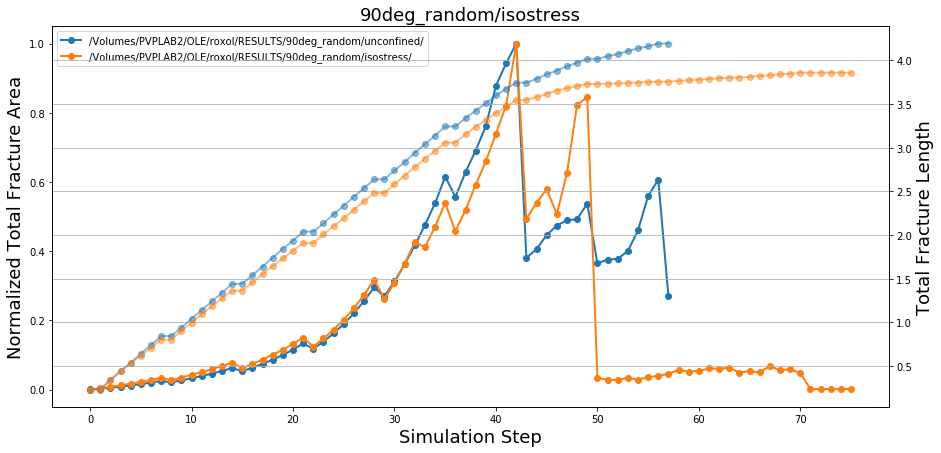

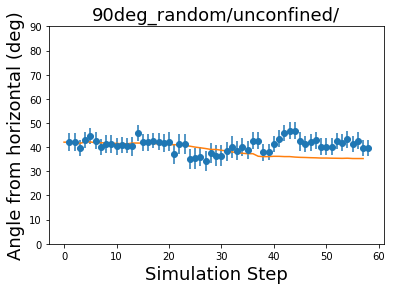

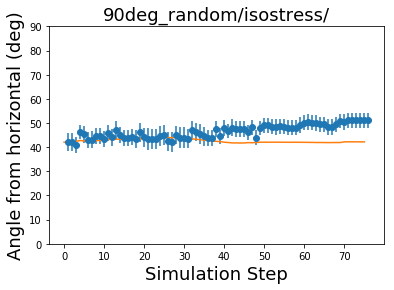

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from FracArea import *
from FracOrientation import *

# type input folder for roxol results
paths =['/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/unconfined/',
       '/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/isostress/']

# type output folder for plots if desired
plotting = False
fpath_out = '/Volumes/PVPLAB2/OLE/roxol/RESULTS/plots/'
fname_out = 'plots_90deg_uncofined.png'


frac_area = {}
frac_length = {}
cnt = 0

for fpath in paths:
    fpath_in_fracNodes = fpath + '*_fracNodes.txt'
    fpath_in_dispVec = fpath + '*_dispVec.txt'
    frac_area[cnt], frac_length[cnt] = FracArea(fpath_in_fracNodes, fpath_in_dispVec, plotting = False, norm_by_len = False)
    cnt += 1

    # -------------------- plot total frac areas for all experiments

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
for i in range(0,cnt):
    line, = ax.plot(frac_area[i]/np.max(frac_area[i]), lw=2, marker='o')
    ax.set_title(fpath_in_fracNodes[35:-16], fontsize=18)
    ax.set_xlabel("Simulation Step", fontsize=18)
    ax.set_ylabel("Normalized Total Fracture Area", fontsize=18)
    line2, = ax2.plot(frac_length[i], lw=2, marker='o', alpha = .5)
    ax2.set_ylabel("Total Fracture Length", fontsize=18)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid(True)
    #plt.ylim([0, 0.5e-2])
    ax.legend(paths)
plt.show()

if plotting == True:
    fig.savefig(fpath_out + fname_out)
    
# ------------------ plot angle evolution -----------------------
for fpath in paths:
    FracOrientation(fpath)

#### Different factors affecting apertures during coalescence and drainage phase

Case 1) Closure due to connection to boundary domain and subsequent drainage

![Aperture drainage 1](notebook_figures/frac_drainage_step_42_with_frac.png)
![Aperture drainage 2](notebook_figures/frac_drainage_step_43_with_frac.png)

Case 2) Stress redistribution due to coalescence

![Aperture coalescnece 1](notebook_figures/frac_interaction_step_41.png)
![Aperture coalescnece 2](notebook_figures/frac_interaction_step_42.png)

### Step 2: Effect of anisotropic stress and initial fracture orientation

PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots


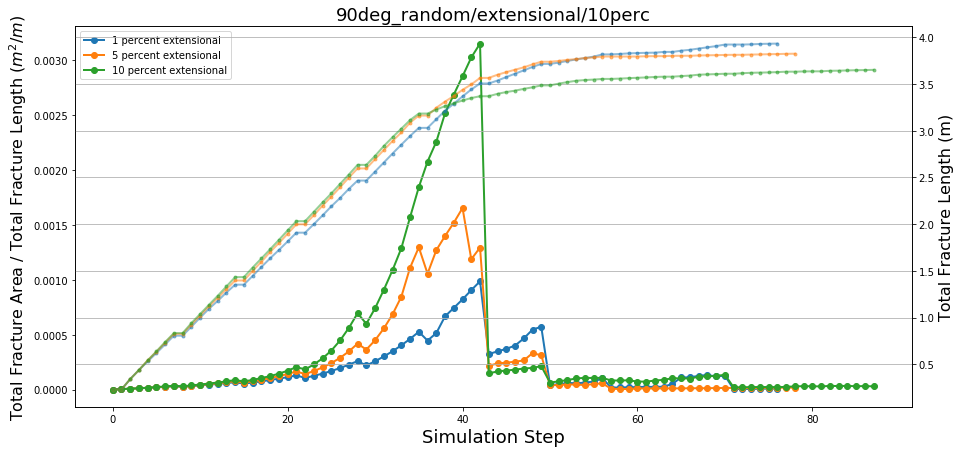

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from FracArea import *
from FracOrientation import *

# type input folder for roxol results
paths =['/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/extensional/1perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/extensional/5perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/extensional/10perc/']

# type output folder for plots if desired
plotting = False
fpath_out = '/Volumes/PVPLAB2/OLE/roxol/RESULTS/plots/'
fname_out = 'plots_90deg_uncofined.png'


frac_area = {}
frac_length = {}
cnt = 0

for fpath in paths:
    fpath_in_fracNodes = fpath + '*_fracNodes.txt'
    fpath_in_dispVec = fpath + '*_dispVec.txt'
    frac_area[cnt], frac_length[cnt] = FracArea(fpath_in_fracNodes, fpath_in_dispVec, plotting = False, norm_by_len = False)
    cnt += 1

    # -------------------- plot total frac areas for all experiments

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
for i in range(0,cnt):
    line, = ax.plot(frac_area[i], lw=2, marker='o')
    ax.set_title(fpath_in_fracNodes[35:-16], fontsize=18)
    ax.set_xlabel("Simulation Step", fontsize=18)
    ax.set_ylabel("Total Fracture Area / Total Fracture Length ($m^2/m$)", fontsize=16)
    line2, = ax2.plot(frac_length[i], lw=2, marker='.', alpha = .5)
    ax2.set_ylabel("Total Fracture Length (m)", fontsize=16)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid(True)
    #plt.ylim([0, 0.5e-2])
    ax.legend(['1 percent extensional','5 percent extensional','10 percent extensional'], loc='upper left')
plt.show()

if plotting == True:
    fig.savefig(fpath_out + fname_out)
    
# ------------------ plot angle evolution -----------------------
#for fpath in paths:
#    FracOrientation(fpath)

PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots


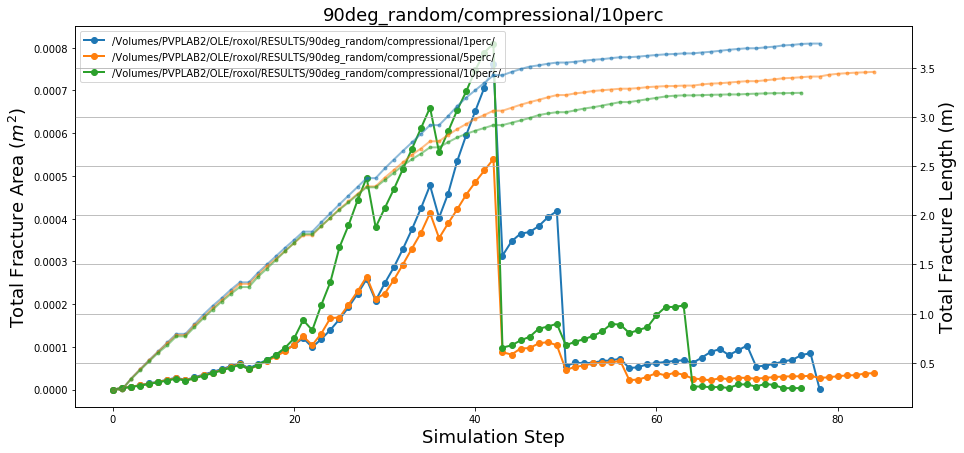

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from FracArea import *
from FracOrientation import *

# type input folder for roxol results
paths =['/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/compressional/1perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/compressional/5perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/compressional/10perc/']

# type output folder for plots if desired
plotting = False
fpath_out = '/Volumes/PVPLAB2/OLE/roxol/RESULTS/plots/'
fname_out = 'plots_90deg_uncofined.png'


frac_area = {}
frac_length = {}
cnt = 0

for fpath in paths:
    fpath_in_fracNodes = fpath + '*_fracNodes.txt'
    fpath_in_dispVec = fpath + '*_dispVec.txt'
    frac_area[cnt], frac_length[cnt] = FracArea(fpath_in_fracNodes, fpath_in_dispVec, plotting = False, norm_by_len = False)
    cnt += 1

    # -------------------- plot total frac areas for all experiments

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
for i in range(0,cnt):
    line, = ax.plot(frac_area[i], lw=2, marker='o')
    ax.set_title(fpath_in_fracNodes[35:-16], fontsize=18)
    ax.set_xlabel("Simulation Step", fontsize=18)
    ax.set_ylabel("Total Fracture Area ($m^2$)", fontsize=18)
    line2, = ax2.plot(frac_length[i], lw=2, marker='.', alpha = .5)
    ax2.set_ylabel("Total Fracture Length (m)", fontsize=18)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid(True)
    #plt.ylim([0, 0.5e-2])
    ax.legend(paths, loc='upper left')
plt.show()

if plotting == True:
    fig.savefig(fpath_out + fname_out)
    
# ------------------ plot angle evolution -----------------------
#for fpath in paths:
#    FracOrientation(fpath)

'/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/compressional/5perc/'

PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots


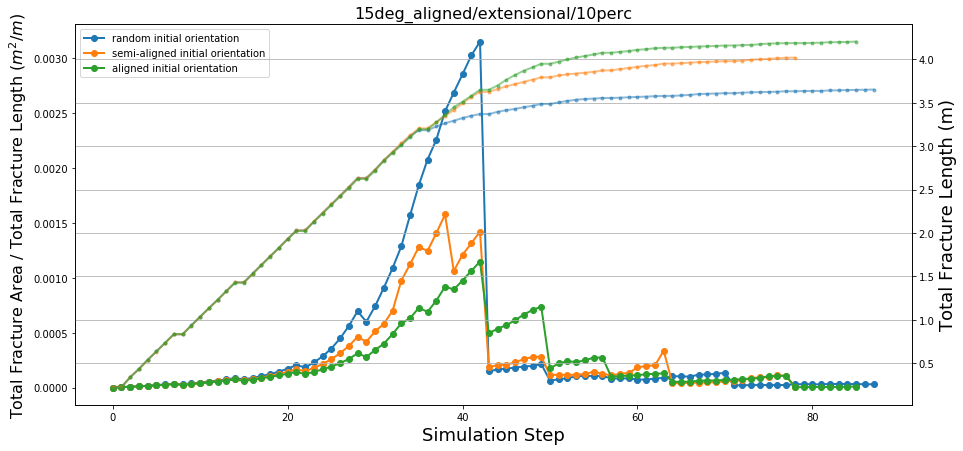

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from FracArea import *
from FracOrientation import *

# type input folder for roxol results
paths =['/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/extensional/10perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/45deg_semialigned/extensional/10perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/15deg_aligned/extensional/10perc/']

# type output folder for plots if desired
plotting = False
fpath_out = '/Volumes/PVPLAB2/OLE/roxol/RESULTS/plots/'
fname_out = 'plots_90deg_uncofined.png'


frac_area = {}
frac_length = {}
cnt = 0

for fpath in paths:
    fpath_in_fracNodes = fpath + '*_fracNodes.txt'
    fpath_in_dispVec = fpath + '*_dispVec.txt'
    frac_area[cnt], frac_length[cnt] = FracArea(fpath_in_fracNodes, fpath_in_dispVec, plotting = False, norm_by_len = False)
    cnt += 1

    # -------------------- plot total frac areas for all experiments

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
for i in range(0,cnt):
    line, = ax.plot(frac_area[i], lw=2, marker='o')
    ax.set_title(fpath_in_fracNodes[35:-16], fontsize=16)
    ax.set_xlabel("Simulation Step", fontsize=18)
    ax.set_ylabel("Total Fracture Area / Total Fracture Length ($m^2/m$)", fontsize=16)
    line2, = ax2.plot(frac_length[i], lw=2, marker='.', alpha = .5)
    ax2.set_ylabel("Total Fracture Length (m)", fontsize=18)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid(True)
    #plt.ylim([0, 0.5e-2])
    ax.legend(['random initial orientation', 'semi-aligned initial orientation', 'aligned initial orientation'], loc='upper left')
plt.show()

if plotting == True:
    fig.savefig(fpath_out + fname_out)
    
# ------------------ plot angle evolution -----------------------
#for fpath in paths:
#    FracOrientation(fpath)

PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots
PLOTTING DISABLED. use arg plotting = True to show plots


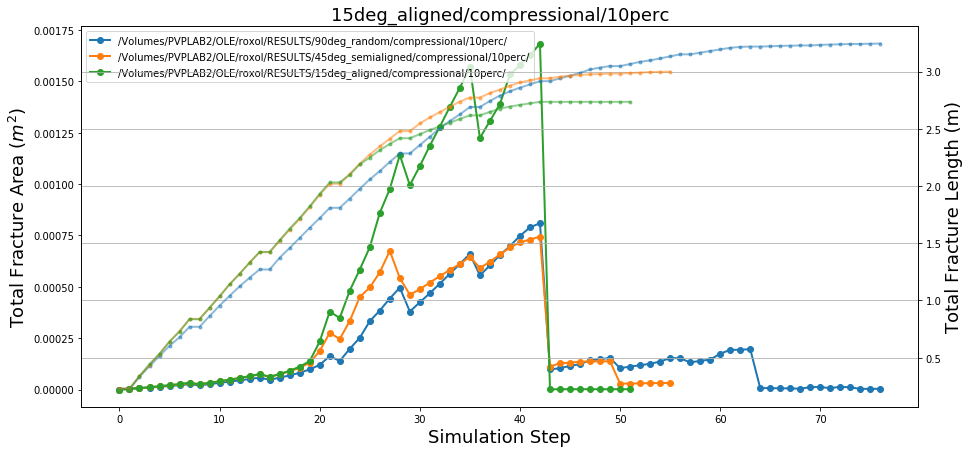

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from FracArea import *
from FracOrientation import *

# type input folder for roxol results
paths =['/Volumes/PVPLAB2/OLE/roxol/RESULTS/90deg_random/compressional/10perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/45deg_semialigned/compressional/10perc/',
        '/Volumes/PVPLAB2/OLE/roxol/RESULTS/15deg_aligned/compressional/10perc/']

# type output folder for plots if desired
plotting = False
fpath_out = '/Volumes/PVPLAB2/OLE/roxol/RESULTS/plots/'
fname_out = 'plots_90deg_uncofined.png'


frac_area = {}
frac_length = {}
cnt = 0

for fpath in paths:
    fpath_in_fracNodes = fpath + '*_fracNodes.txt'
    fpath_in_dispVec = fpath + '*_dispVec.txt'
    frac_area[cnt], frac_length[cnt] = FracArea(fpath_in_fracNodes, fpath_in_dispVec, plotting = False, norm_by_len = False)
    cnt += 1

    # -------------------- plot total frac areas for all experiments

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
for i in range(0,cnt):
    line, = ax.plot(frac_area[i], lw=2, marker='o')
    ax.set_title(fpath_in_fracNodes[35:-16], fontsize=18)
    ax.set_xlabel("Simulation Step", fontsize=18)
    ax.set_ylabel("Total Fracture Area ($m^2$)", fontsize=18)
    line2, = ax2.plot(frac_length[i], lw=2, marker='.', alpha = .5)
    ax2.set_ylabel("Total Fracture Length (m)", fontsize=18)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid(True)
    #plt.ylim([0, 0.5e-2])
    ax.legend(paths, loc='upper left')
plt.show()

if plotting == True:
    fig.savefig(fpath_out + fname_out)
    
# ------------------ plot angle evolution -----------------------
#for fpath in paths:
#    FracOrientation(fpath)